<a href="https://colab.research.google.com/github/ChandanCharchit/Computer_Vision_Project/blob/main/Fire_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import PIL

import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import os
import matplotlib.image as mpimg
%matplotlib inline
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

In [2]:
train_path='/content/drive/MyDrive/Datasets/Fire data/Train'
val_path='/content/drive/MyDrive/Datasets/Fire data/Vali'
test_path='/content/drive/MyDrive/Datasets/Fire data/Test'

In [3]:
!nvidia-smi

Sun Apr  4 09:33:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
training_datagen=ImageDataGenerator(rescale=1./255)

validation_datagen=ImageDataGenerator(rescale=1./255)

training_data=training_datagen.flow_from_directory(train_path,
                                                   target_size=(227,227),
                                                   class_mode='binary',
                                                   batch_size=158)

valid_data=validation_datagen.flow_from_directory(val_path,
                                                  target_size=(227,227),
                                                  class_mode='binary',
                                                  batch_size=100)



Found 6004 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
training_data.next()[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1.], dtype=float32)

In [6]:
from tensorflow.keras.optimizers import RMSprop

**Model**

In [7]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
                                  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                  tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                  tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
                                  tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1024, activation='relu'),
                                  tf.keras.layers.Dropout(0.25),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3456)              0

In [8]:
history=model.fit(training_data,
                  steps_per_epoch=38,
                  epochs = 50,
                  validation_data = valid_data,
                  validation_steps=20
                  )


Epoch 1/50
38/38 [==============================] - 2406s 63s/step - loss: 6.8670 - acc: 0.5328 - val_loss: 0.7412 - val_acc: 0.5000
Epoch 2/50
38/38 [==============================] - 20s 534ms/step - loss: 0.8363 - acc: 0.5740 - val_loss: 0.8311 - val_acc: 0.5120
Epoch 3/50
38/38 [==============================] - 20s 535ms/step - loss: 0.6909 - acc: 0.6466 - val_loss: 0.6767 - val_acc: 0.5855
Epoch 4/50
38/38 [==============================] - 21s 545ms/step - loss: 0.6733 - acc: 0.6902 - val_loss: 0.6222 - val_acc: 0.5760
Epoch 5/50
38/38 [==============================] - 20s 532ms/step - loss: 0.6443 - acc: 0.6791 - val_loss: 0.7317 - val_acc: 0.6090
Epoch 6/50
38/38 [==============================] - 20s 536ms/step - loss: 0.6514 - acc: 0.7095 - val_loss: 0.4826 - val_acc: 0.7950
Epoch 7/50
38/38 [==============================] - 20s 536ms/step - loss: 0.5952 - acc: 0.7502 - val_loss: 0.6535 - val_acc: 0.5910
Epoch 8/50
38/38 [==============================] - 20s 535ms/step - 

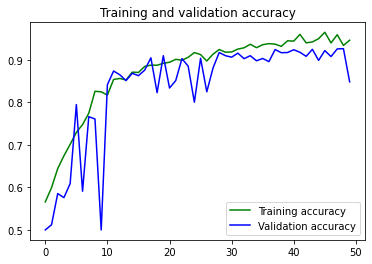

<Figure size 432x288 with 0 Axes>

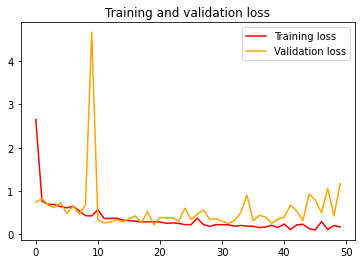

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [10]:
from google.colab import files
from keras.preprocessing import image

In [28]:
uploaded =files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+ fn
  img=image.load_img(path, target_size=(227,227))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)

  images=np.vstack([x])
  classes=model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + ' has Fire in the image')
  else:
    print(fn + ' has no Fire in the image')

Saving dayroad23.jpg to dayroad23 (1).jpg
[0.]
dayroad23.jpg has Fire in the image
